In [2]:

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline
import random, operator
import time
import itertools
import numpy
import math



random.seed(time.time()) # planting a random seed

In [3]:
City = complex 

In [4]:

def distance(A, B): 
    "The Euclidean distance between two cities."
    return abs(A - B)

In [5]:
A = City(300, 0)
B = City(0, 400)
distance(A, B)

500.0

In [6]:
def generate_cities(n):
    "Make a set of n cities, each with random coordinates."
    return set(City(random.randrange(10, 890), 
                    random.randrange(10, 590)) 
               for c in range(n))

In [7]:

cities8, cities10, cities100, cities1000 = generate_cities(8), generate_cities(10), generate_cities(100), generate_cities(1000)

In [8]:
def plot_tour(tour, alpha=1, color=None):
    # Plot the tour as blue lines between blue circles, and the starting city as a red square.
    plotline(list(tour) + [tour[0]], alpha=alpha, color=color)
    plotline([tour[0]], 'rs', alpha=alpha)
    # plt.show()
    
def plotline(points, style='bo-', alpha=1, color=None):
    "Plot a list of points (complex numbers) in the 2-D plane."
    X, Y = XY(points)
    
    if color:
        plt.plot(X, Y, style, alpha=alpha, color=color)
    else:
        plt.plot(X, Y, style, alpha=alpha)
    
def XY(points):
    "Given a list of points, return two lists: X coordinates, and Y coordinates."
    return [p.real for p in points], [p.imag for p in points]

In [9]:
num_cities = 30
cities = generate_cities(num_cities)

In [10]:
from deap import algorithms, base, creator, tools

In [13]:
toolbox = base.Toolbox()
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox.register("indices", numpy.random.permutation, len(cities))
toolbox.register("individual", tools.initIterate, creator.Individual,
                 toolbox.indices)
toolbox.register("population", tools.initRepeat, list, 
                 toolbox.individual)

toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)

def create_tour(individual):
    return [list(cities)[e] for e in individual]
def evaluation(individual):
    '''Evaluates an individual by converting it into 
    a list of cities and passing that list to total_distance'''
    return (total_distance(create_tour(individual)),)
toolbox.register("evaluate", evaluation)

toolbox.register("select", tools.selTournament, tournsize=3)

pop = toolbox.population(n=100)



In [16]:

def total_distance(tour):
    "The total distance between each pair of consecutive cities in the tour."
    return sum(distance(tour[i], tour[i-1]) 
               for i in range(len(tour)))

In [17]:
%%time 
result, log = algorithms.eaSimple(pop, toolbox,
                             cxpb=0.8, mutpb=0.2,
                             ngen=400, verbose=False)

Wall time: 5.17 s


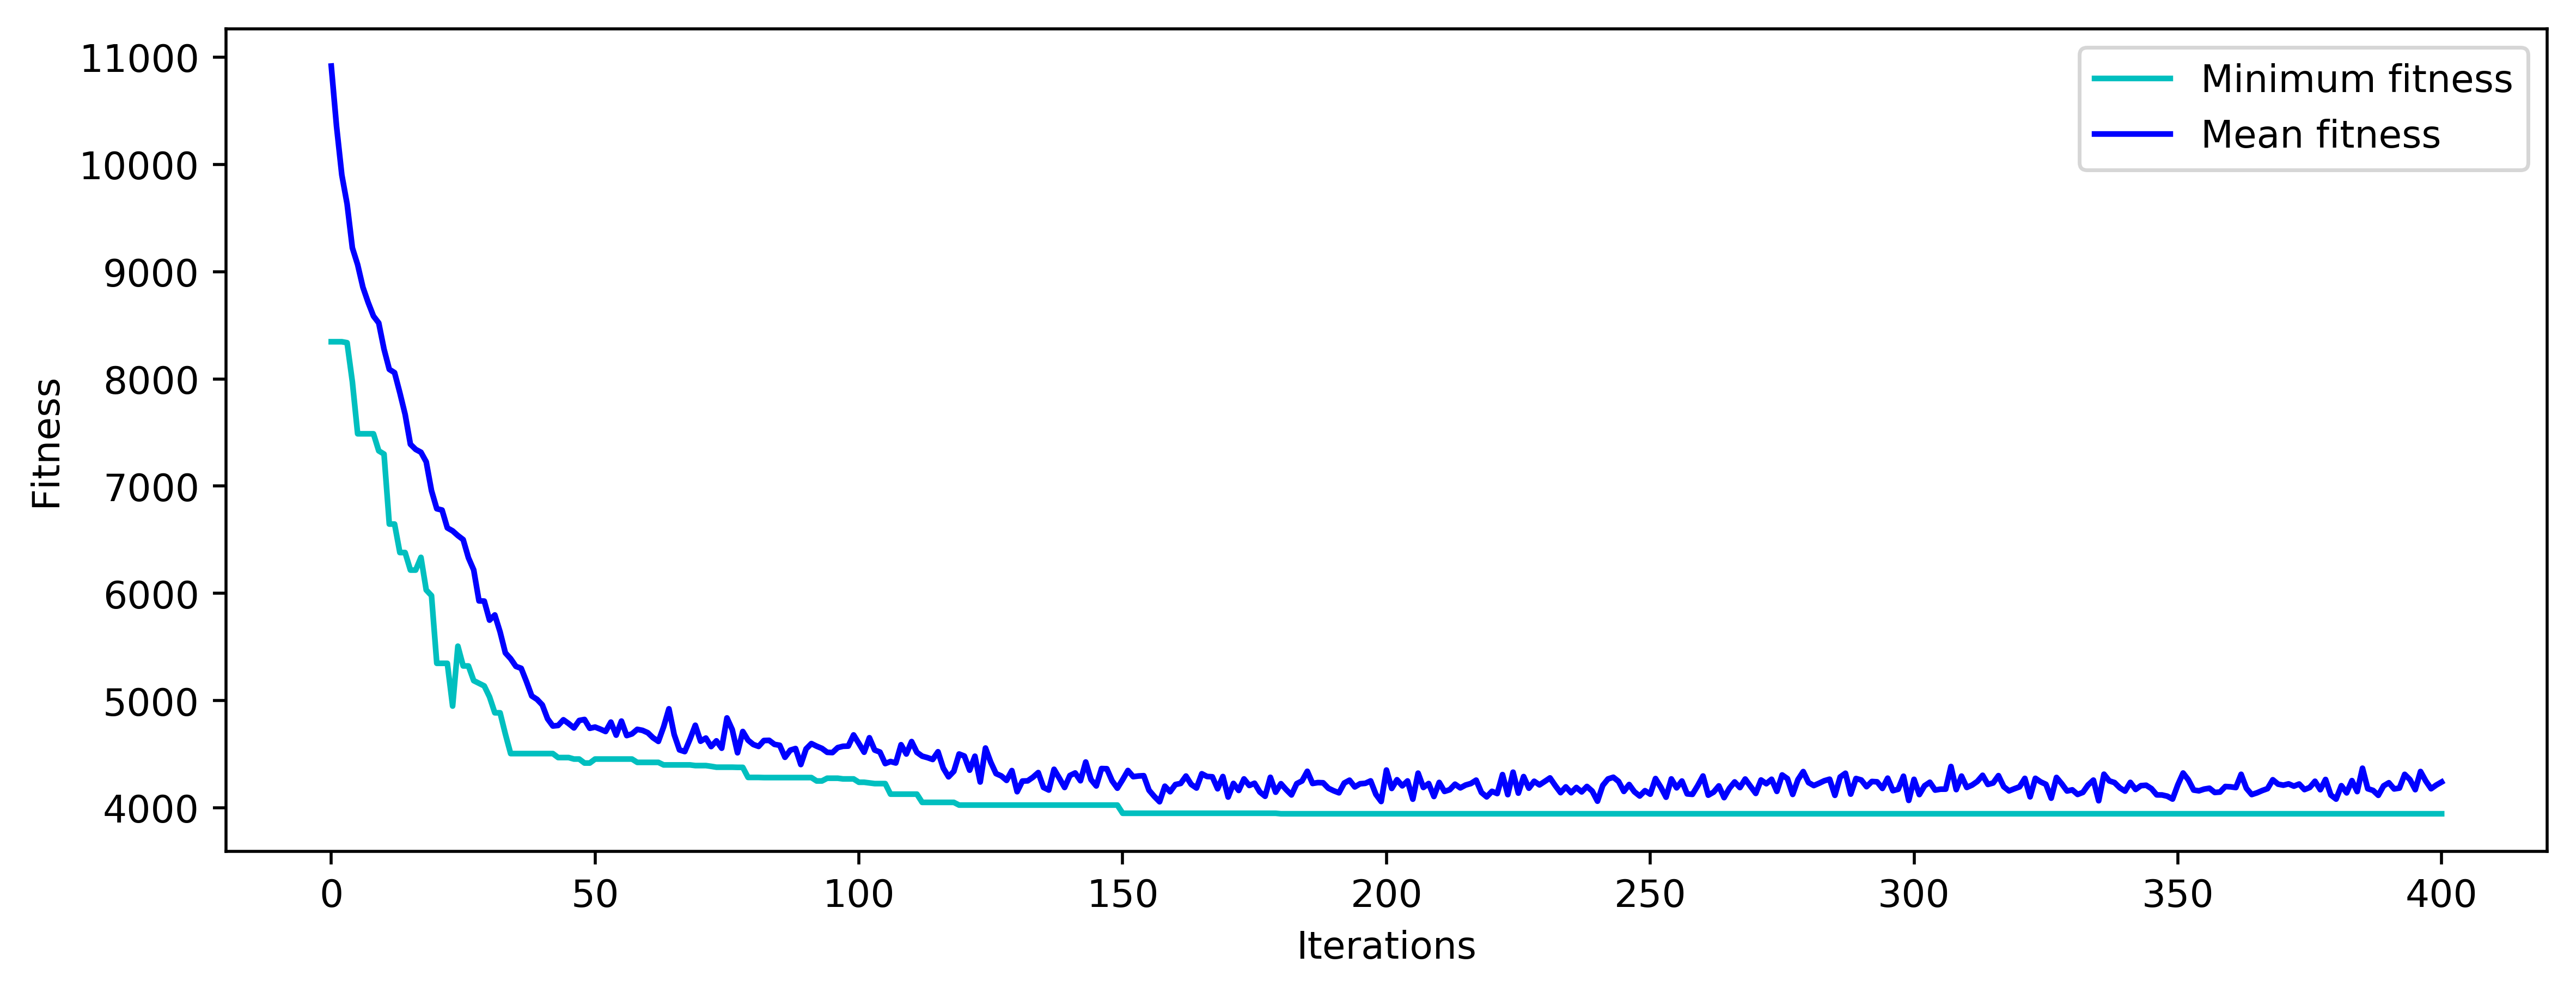

In [19]:
fit_stats = tools.Statistics(key=operator.attrgetter("fitness.values"))
fit_stats.register('mean', numpy.mean)
fit_stats.register('min', numpy.min)

result, log = algorithms.eaSimple(toolbox.population(n=100), toolbox,
                                  cxpb=0.5, mutpb=0.2,
                                  ngen=400, verbose=False,
                                  stats=fit_stats)

plt.figure(1, figsize=(11, 4), dpi=500)
plots = plt.plot(log.select('min'),'c-', log.select('mean'), 'b-', antialiased=True)
plt.legend(plots, ('Minimum fitness', 'Mean fitness'))
plt.ylabel('Fitness')
plt.xlabel('Iterations')

In [2]:
import pandas as pd
import numpy
df = pd.DataFrame(numpy.random.randint(2,size=[10, 10]))
df

,0,1,2,3,4,5,6,7,8,9
0,1,1,1,1,1,0,0,1,1,1
1,0,1,1,1,1,0,1,1,1,1
2,1,0,1,1,0,0,1,1,1,1
3,1,1,1,0,1,0,1,1,1,1
4,1,0,1,0,1,0,1,1,1,1
5,1,0,1,0,1,1,1,0,1,0
6,0,0,1,0,0,1,0,0,0,0
7,0,0,1,1,0,0,0,0,0,0
8,0,1,0,1,1,1,0,1,1,1
9,0,1,0,1,0,0,1,0,1,1


In [7]:
def find(lst, a):
    return [i for i, x in enumerate(lst) if x==a]
find([0,0,1,0,1],1)

[2, 4]

In [28]:
df[[2,9]]

,2,9
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,0
6,1,0
7,1,0
8,0,1
9,0,1


In [31]:
(df[[2,9]].sum(axis = 1) >= 1).sum()

10

In [3]:
from deap import algorithms, base, creator, tools

In [61]:
creator.create("Fitness", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.Fitness)

In [81]:
toolbox = base.Toolbox()
toolbox.register("attr_int", random.randint,0,1)
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_int, n=10)
toolbox.register("population", tools.initRepeat, list, 
                 toolbox.individual)
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("evaluate", evaluation)
#toolbox.register("select", tools.selNSGA2)
toolbox.register("select", tools.selTournament, tournsize=3)
pop = toolbox.population(n=100)


In [63]:
%%time 
result, log = algorithms.eaSimple(pop, toolbox,
                             cxpb=0.8, mutpb=0.2,
                             ngen=50, verbose=False)

Wall time: 3.17 s


In [74]:
best_individual = tools.selBest(result, k=1)[0]
print('Fitness of the best individual: ', evaluation(best_individual)[0])

('Fitness of the best individual: ', 7)


In [82]:
import operator
hof = tools.ParetoFront()
fit_stats = tools.Statistics(key=operator.attrgetter("fitness.values"))
fit_stats.register('mean', numpy.mean)
fit_stats.register('min', numpy.max)
result, log = algorithms.eaSimple(toolbox.population(n=100), toolbox,
                                  cxpb=0.5, mutpb=0.2,
                                  ngen=100, verbose=False,
                                  stats=fit_stats,halloffame = hof)

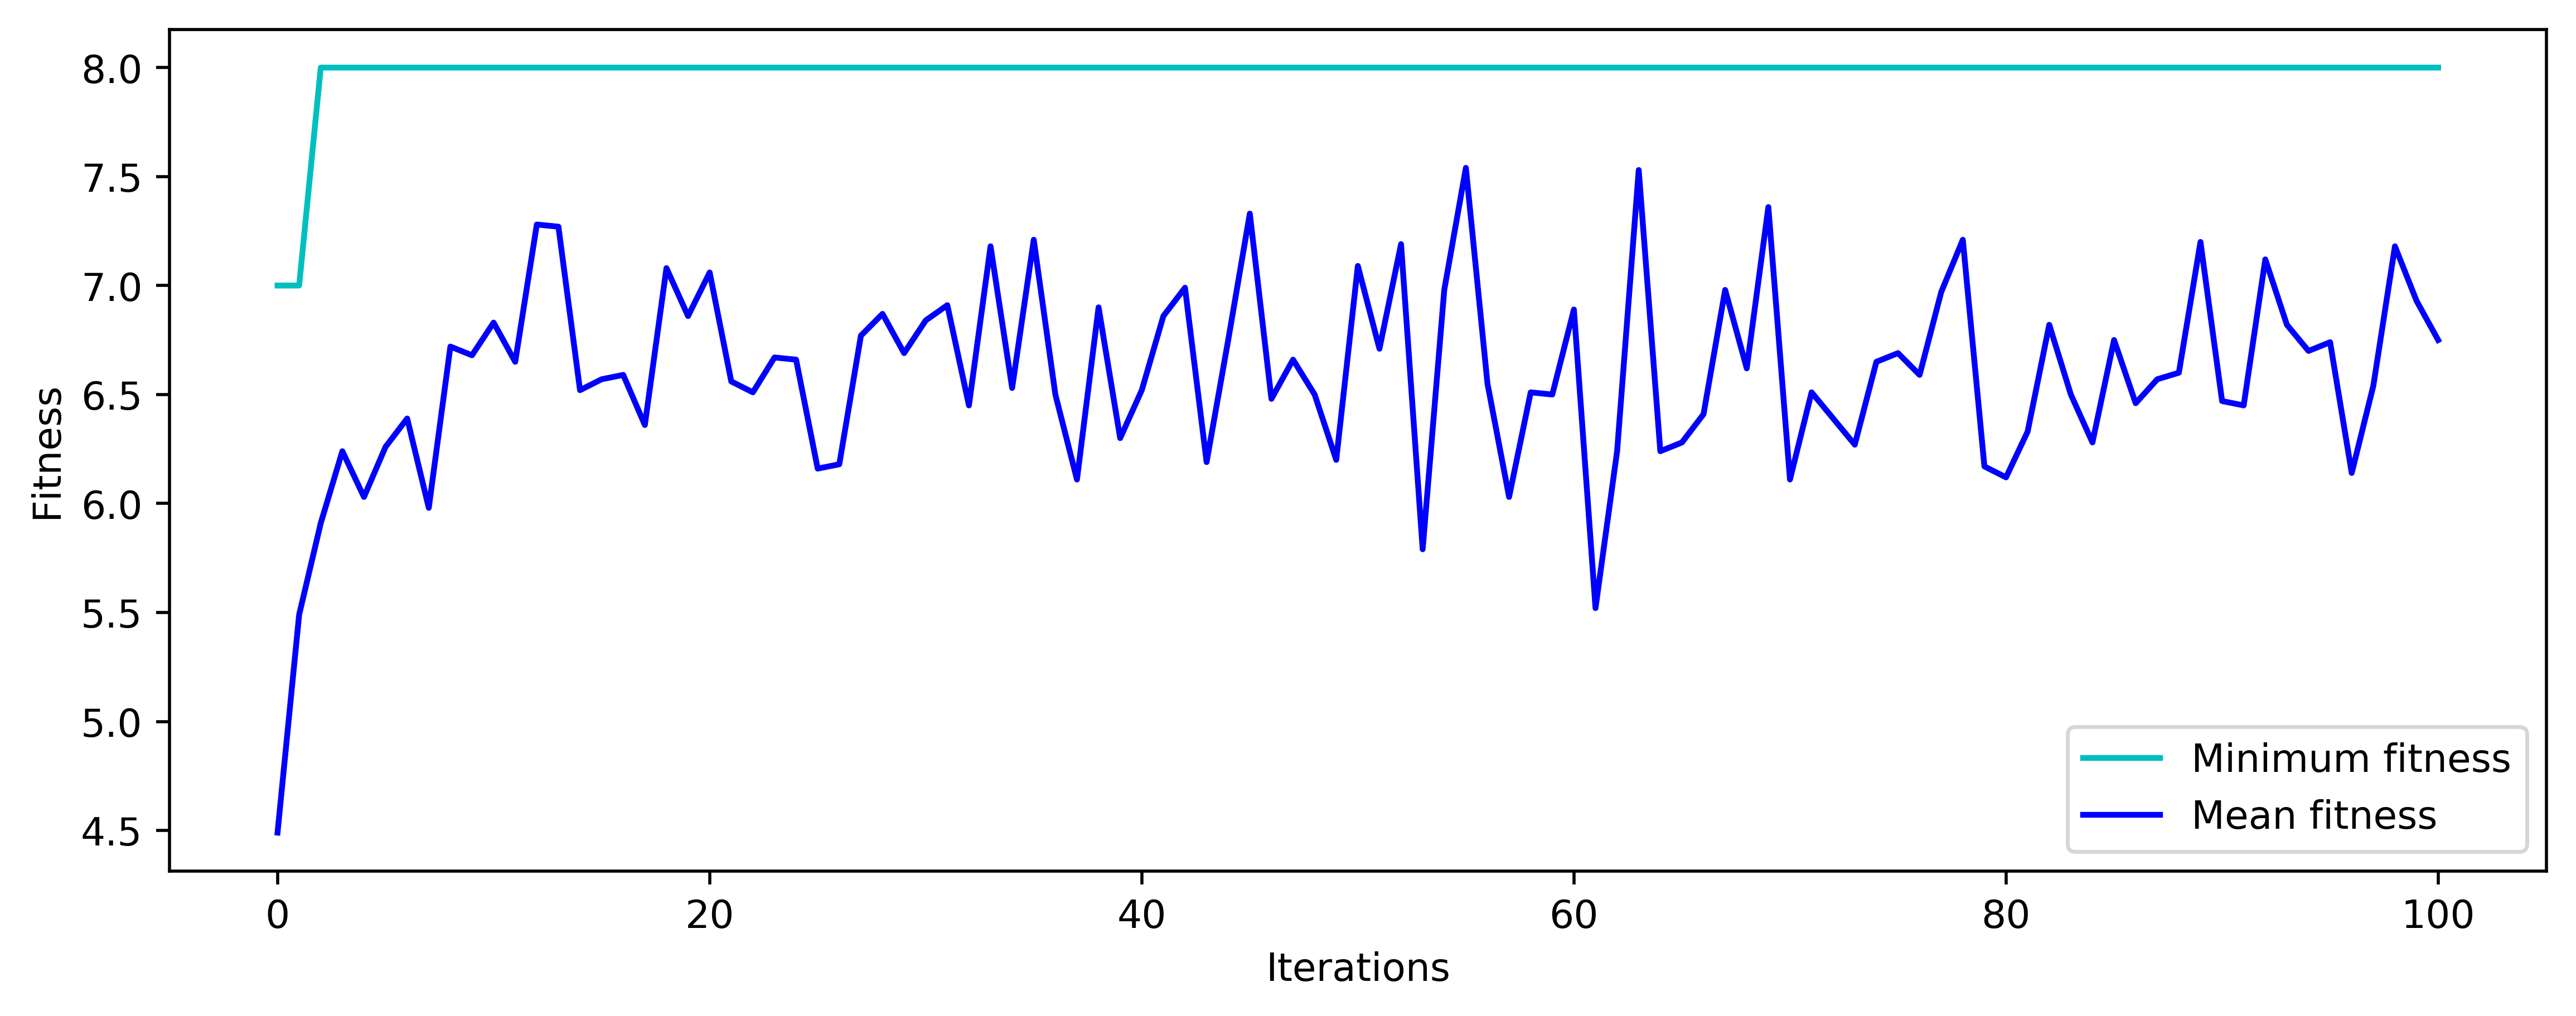

In [83]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline
plt.figure(1, figsize=(11, 4), dpi=500)
plots = plt.plot(log.select('min'),'c-', log.select('mean'), 'b-', antialiased=True)
plt.legend(plots, ('Minimum fitness', 'Mean fitness'))
plt.ylabel('Fitness')
plt.xlabel('Iterations')

In [84]:
for i in hof:
    print i,evaluation(i)

[0, 0, 1, 0, 0, 0, 0, 0, 0, 1] (8,)
[0, 0, 1, 0, 0, 0, 0, 0, 1, 0] (8,)
[0, 1, 1, 0, 0, 0, 0, 0, 0, 0] (8,)
[0, 0, 1, 1, 0, 0, 0, 0, 0, 0] (8,)


In [60]:
def evaluation(individual):
    my_list = find(individual,1)
    number = len(my_list)
    coverage = (df[my_list].sum(axis = 1) >= 1).sum()
    return (coverage-number,)

In [13]:
import random

from deap import base
from deap import creator
from deap import tools

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

IND_SIZE=10

toolbox = base.Toolbox()
toolbox.register("attr_int", random.randint,0,1)
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_int, n=10)
toolbox.individual()

[0, 0, 1, 0, 1, 0, 0, 1, 0, 0]

In [1]:
# test my PNPSMC

import pandas as pd
pos_tsv = "GM12878@1kb.part1.pos.FitHic.output.bed.module.tsv"
neg_tsv = "GM12878@1kb.part1.neg.FitHic.output.bed.module.tsv"

data = pd.concat((pd.read_csv(f,delimiter = "\t",header = 0,index_col = 0) for f in [pos_tsv,neg_tsv]))

# read data done





In [2]:
data.columns[0:2]

Index([u'factorbook-AP2%%factorbook-AP2', u'factorbook-AP2%%factorbook-B-Box'], dtype='object')

In [3]:
a=['factorbook-AP2%%factorbook-AP2','factorbook-AP2%%factorbook-B-Box']
data[a]

,factorbook-AP2%%factorbook-AP2,factorbook-AP2%%factorbook-B-Box
chr21-38062500%%chr21-38078500,12.34850,0.000000
chr21-35223500%%chr21-35629500,0.00000,0.000000
chr21-18000500%%chr21-18015500,0.00000,0.000000
chr21-45212500%%chr21-45239500,0.00000,9.886340
chr21-44351500%%chr21-44510500,0.00000,12.765150
chr21-34215500%%chr21-34321500,0.00000,0.000000
chr21-27302500%%chr21-27346500,0.00000,0.000000
chr21-44736500%%chr21-44894500,0.00000,0.000000
chr21-47613500%%chr21-47657500,0.00000,0.000000
chr21-46543500%%chr21-46567500,0.00000,10.477270


In [7]:
import numpy as np
def satisfactory_function(x):
	k=5
	y = 2*k/(1+np.exp(-x+k))
	return y


In [9]:
satisfactory_function(3)

1.1920292202211755

In [5]:
my_list = [1,2,3]
%timeit data[my_list].columns
# a = data[[my_list[1]]].values

# b=a.mean(axis = 0)
# b[0]
# data[[1]].values + data[[2]].values
# a =  data[[my_list[0]]].values
# a
# for i in range(1,len(my_list)):
#     first = my_list[i]
#     a += data[first][data["Class"] == 1].values
# (a>0).sum() 
# for i in range(1,len(my_list)):
#     first = my_list[i]
#     a= a.multiply(data[[first]][data["Class"] == 1].values,axis="columns")
# (a>0).sum()


1000 loops, best of 3: 354 µs per loop


In [2]:
def satisfactory_function(x,k):
    y = float(2*k)/(1+exp(x+k))
    return y

In [52]:
def PNPSMC_evaluation(individual):
    my_list = find(individual,1)
    a =  data[[my_list[0]]][data["Class"] == 1].values
    for i in range(1,len(my_list)):
        first = my_list[i]
        a += data[[first]][data["Class"] == 1].values
    B_plus = (a>0).sum() 
    
    a =  data[[my_list[0]]][data["Class"] == -1].values
    for i in range(1,len(my_list)):
        first = my_list[i]
        a += data[[first]][data["Class"] == -1].values
    B_minus = (a>0).sum()  
    
    number = len(my_list)
    B_plus = B_plus / 10000.0
    B_minus = B_minus / 10000.0
    
    fitness = B_plus-B_minus+(len(individual)-number)/float(len(individual))
    return (fitness,)

In [ ]:
from deap import algorithms, base, creator, tools
import random
import numpy
creator.create("Fitness", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.Fitness)

toolbox = base.Toolbox()
toolbox.register("attr_int", random.randint,0,1)
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_int, n=len(data.columns))
toolbox.register("population", tools.initRepeat, list, 
                 toolbox.individual)
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("evaluate", PNPSMC_evaluation)
#toolbox.register("select", tools.selNSGA2)
toolbox.register("select", tools.selTournament, tournsize=3)
# pop = toolbox.population(n=100)

import operator
hof = tools.ParetoFront()
fit_stats = tools.Statistics(key=operator.attrgetter("fitness.values"))
fit_stats.register('mean', numpy.mean)
fit_stats.register('min', numpy.max)
result, log = algorithms.eaSimple(toolbox.population(n=100), toolbox,
                                  cxpb=0.5, mutpb=0.2,
                                  ngen=100, verbose=False,
                                  stats=fit_stats,halloffame = hof)

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline
plt.figure(1, figsize=(11, 4), dpi=500)
plots = plt.plot(log.select('min'),'c-', log.select('mean'), 'b-', antialiased=True)
plt.legend(plots, ('Minimum fitness', 'Mean fitness'))
plt.ylabel('Fitness')
plt.xlabel('Iterations')

# for i in hof:
#     print i,evaluation(i)